In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations

In [2]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,minmax_scale

In [3]:
path="data3/"
files=os.listdir(path) 
data=pd.DataFrame()
for f in files:
    temp=pd.read_csv(path+f)
    data=pd.concat([temp,data]) 
print(data.shape[0])
data.head()

46747


,NEH,px_t,RMSE,fNatIsotopes0,fNatIsotopes1,fNatIsotopes2,fNatIsotopes3,fNatIsotopes4,fNatIsotopes5,current_Exp_isotope_distribution_t0[0],...,current_Exp_isotope_distribution[1],current_Exp_isotope_distribution[2],current_Exp_isotope_distribution[3],current_Exp_isotope_distribution[4],current_Exp_isotope_distribution[5],NumberOfHydrogens,PeptideSeq,SeqMass,Charge,Exp_time
0,41,0.038559,0.113513,0.38286,0.35096,0.1775,0.06441,0.0186,0.00452,0.392492,...,0.321954,0.217297,0.129999,0.032904,0.023937,106,HEEQPAPAYEVHNR,559.59735,3,1
1,20,0.038559,0.088737,0.42956,0.34844,0.15587,0.05002,0.01277,0.00274,0.449484,...,0.366433,0.18427,0.074455,0.003301,0.0,108,EEAVLFLLDLPK,693.89758,2,1
2,41,0.044796,0.105019,0.38286,0.35096,0.1775,0.06441,0.0186,0.00452,0.392492,...,0.318667,0.224858,0.141909,0.07285,0.02581,106,HEEQPAPAYEVHNR,559.59735,3,2
3,20,0.044796,0.070483,0.42956,0.34844,0.15587,0.05002,0.01277,0.00274,0.449484,...,0.382896,0.220939,0.090148,0.018817,0.0,108,EEAVLFLLDLPK,693.89758,2,2
4,41,0.045805,0.089191,0.38286,0.35096,0.1775,0.06441,0.0186,0.00452,0.392492,...,0.241553,0.266878,0.164518,0.070825,0.039785,106,HEEQPAPAYEVHNR,559.59735,3,3


In [4]:
data.columns

Index(['NEH', 'px_t', 'RMSE', 'fNatIsotopes0', 'fNatIsotopes1',
       'fNatIsotopes2', 'fNatIsotopes3', 'fNatIsotopes4', 'fNatIsotopes5',
       'current_Exp_isotope_distribution_t0[0]',
       'current_Exp_isotope_distribution_t0[1]',
       'current_Exp_isotope_distribution_t0[2]',
       'current_Exp_isotope_distribution_t0[3]',
       'current_Exp_isotope_distribution_t0[4]',
       'current_Exp_isotope_distribution_t0[5]', 'fLabIsotopes[0]',
       'fLabIsotopes[1]', 'fLabIsotopes[2]', 'fLabIsotopes[3]',
       'fLabIsotopes[4]', 'fLabIsotopes[5]',
       'current_Exp_isotope_distribution[0]',
       'current_Exp_isotope_distribution[1]',
       'current_Exp_isotope_distribution[2]',
       'current_Exp_isotope_distribution[3]',
       'current_Exp_isotope_distribution[4]',
       'current_Exp_isotope_distribution[5]', 'NumberOfHydrogens',
       'PeptideSeq', 'SeqMass', 'Charge', 'Exp_time'],
      dtype='object')

In [5]:
y=data.NEH

In [6]:

x= data[['fNatIsotopes0', 'fNatIsotopes1','fNatIsotopes2', 'fNatIsotopes3', 'fNatIsotopes4', 'fNatIsotopes5',
         
       'current_Exp_isotope_distribution_t0[0]',
       'current_Exp_isotope_distribution_t0[1]',
       'current_Exp_isotope_distribution_t0[2]',
       'current_Exp_isotope_distribution_t0[3]',
       'current_Exp_isotope_distribution_t0[4]',
       'current_Exp_isotope_distribution_t0[5]', 
       
       'current_Exp_isotope_distribution[0]',
       'current_Exp_isotope_distribution[1]',
       'current_Exp_isotope_distribution[2]',
       'current_Exp_isotope_distribution[3]',
       'current_Exp_isotope_distribution[4]',
       'current_Exp_isotope_distribution[5]', 
       
       'NumberOfHydrogens',
       'Exp_time'
       ]]# 'fLabIsotopes[0]','fLabIsotopes[1]', 'fLabIsotopes[2]', 'fLabIsotopes[3]','fLabIsotopes[4]', 'fLabIsotopes[5]','PeptideSeq', 'SeqMass', 'Charge', 
# scaler = StandardScaler()
# x=scaler.fit_transform(x)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,shuffle=False)

0.37562576275083354 108.44636935188038


Text(0, 0.5, 'Predicted NEH')

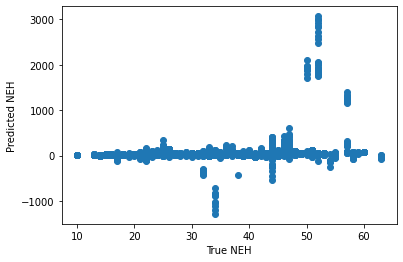

In [8]:
# poly model
interaction = PolynomialFeatures(
    degree = 4, 
	include_bias = False, interaction_only = True)
interaction_x = interaction.fit_transform(X_train)

# linear regression
regression = LinearRegression()

# Fit the linear regression
model = regression.fit(interaction_x, y_train)

#predict
ypred=model.predict(interaction.transform(X_test))
ypred=[round(y) for y in ypred]
print(metrics.mean_absolute_percentage_error(y_test, ypred),metrics.mean_squared_error(y_test, ypred)**0.5)
plt.scatter(y_test,ypred)
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")

In [110]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(X_train, y_train)
ypred=svr_rbf.predict(X_test)
ypred=[round(y) for y in ypred]
metrics.mean_absolute_percentage_error(y_test, ypred)

25.04340124003543

In [111]:
svr_lin.fit(X_train, y_train)
ypred=svr_lin.predict(X_test)
ypred=[round(y) for y in ypred]
metrics.mean_absolute_percentage_error(y_test, ypred) #mean_squared_error

15.87156775907883

In [ ]:
svr_poly.fit(X_train, y_train)
ypred=svr_poly.predict(X_test)
ypred=[round(y) for y in ypred]
metrics.mean_absolute_percentage_error(y_test, ypred)

In [37]:
import xgboost 
model = xgboost.XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(np.array(interaction_x), y_train)
ypred=model.predict(np.array(interaction.transform(X_test)))
ypred=[round(y) for y in ypred]
print(metrics.mean_absolute_percentage_error(y_test, ypred),metrics.mean_squared_error(y_test, ypred)**0.5)

0.12972140809380964 4.479804104916127


Epoch 1/100
251/251 [==============================] - 1s 3ms/step - loss: 182.5257 - val_loss: 40.3481
Epoch 2/100
251/251 [==============================] - 1s 3ms/step - loss: 40.5225 - val_loss: 39.9989
Epoch 3/100
251/251 [==============================] - 1s 3ms/step - loss: 40.4493 - val_loss: 39.8106
Epoch 4/100
251/251 [==============================] - 1s 3ms/step - loss: 40.2954 - val_loss: 40.0093
Epoch 5/100
251/251 [==============================] - 1s 3ms/step - loss: 40.2973 - val_loss: 39.3283
Epoch 6/100
251/251 [==============================] - 1s 2ms/step - loss: 39.6333 - val_loss: 39.9335
Epoch 7/100
251/251 [==============================] - 1s 3ms/step - loss: 39.4912 - val_loss: 38.8269
Epoch 8/100
251/251 [==============================] - 1s 3ms/step - loss: 39.0578 - val_loss: 38.1470
Epoch 9/100
251/251 [==============================] - 1s 3ms/step - loss: 38.4952 - val_loss: 38.2501
Epoch 10/100
251/251 [==============================] - 1s 2ms/step - lo

Epoch 80/100
251/251 [==============================] - 1s 2ms/step - loss: 23.9898 - val_loss: 22.9030
Epoch 81/100
251/251 [==============================] - 1s 2ms/step - loss: 24.0433 - val_loss: 23.1173
Epoch 82/100
251/251 [==============================] - 0s 2ms/step - loss: 24.2726 - val_loss: 23.3045
Epoch 83/100
251/251 [==============================] - 1s 2ms/step - loss: 24.1000 - val_loss: 22.2495
Epoch 84/100
251/251 [==============================] - 1s 3ms/step - loss: 24.4067 - val_loss: 23.3307
Epoch 85/100
251/251 [==============================] - 1s 3ms/step - loss: 24.1511 - val_loss: 23.1767
Epoch 86/100
251/251 [==============================] - 1s 3ms/step - loss: 24.0041 - val_loss: 22.2441
Epoch 87/100
251/251 [==============================] - 1s 3ms/step - loss: 24.1404 - val_loss: 22.3710
Epoch 88/100
251/251 [==============================] - 1s 3ms/step - loss: 24.4066 - val_loss: 22.9538
Epoch 89/100
251/251 [==============================] - 1s 3ms/s

Text(0, 0.5, 'Predicted NEH')

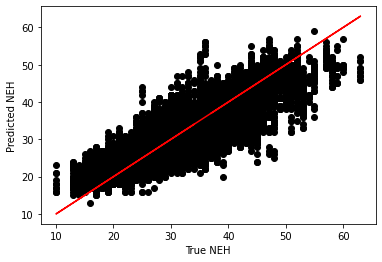

In [31]:
# Regression Example With Boston Dataset: Baseline
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization 
 
# define base model
 
model = Sequential()
model.add(Dense(128, input_shape=(20,), kernel_initializer='normal', activation='relu'))
model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
model.add(Dense(32,  kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam') 

# model.fit(np.array(interaction.transform(X_train)).astype(np.float32), y_train.astype(np.float32),epochs=200,batch_size=50,validation_split=0.2)
# ypred=model.predict(np.array(interaction.transform(X_test)).astype(np.float32))
# ypred=[round(y) for y in ypred.ravel()]

history=model.fit(np.array((X_train)).astype(np.float32), y_train.astype(np.float32),epochs=100,batch_size=100,validation_split=0.2)
ypred=model.predict(np.array((X_test)).astype(np.float32))
ypred=[round(y) for y in ypred.ravel()]


print("MAP=",metrics.mean_absolute_percentage_error(y_test, ypred),"\nRMSE=",metrics.mean_squared_error(y_test, ypred)**0.5)
plt.plot(y_test,y_test,c='r')
plt.scatter(y_test,ypred,c='k')
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")

MAP= 0.1155038048995455 
RMSE= 4.413130904395985


Text(0, 0.5, 'Predicted NEH')

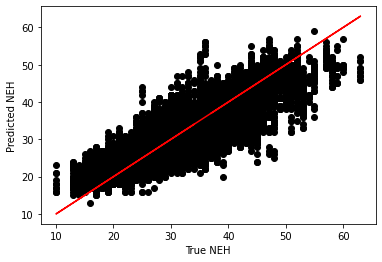

In [32]:
print("MAP=",metrics.mean_absolute_percentage_error(y_test, ypred),"\nRMSE=",metrics.mean_squared_error(y_test, ypred)**0.5)
plt.plot(y_test,y_test,c='r')
plt.scatter(y_test,ypred,c='k')
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")